In [1]:
%matplotlib notebook

<IPython.core.display.Javascript object>


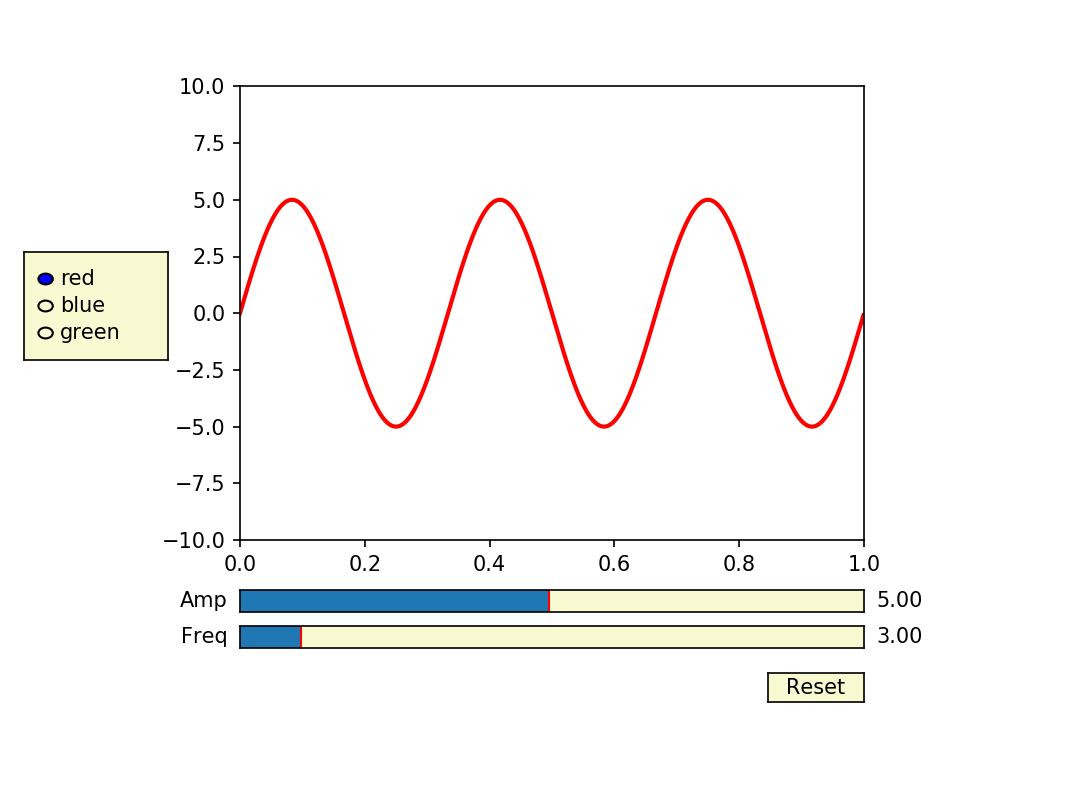

0

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
s = a0*np.sin(2*np.pi*f0*t)
l, = plt.plot(t, s, lw=2, color='red')
plt.axis([0, 1, -10, 10])

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()
sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

In [3]:
import matplotlib.colors

In [9]:
from matplotlib.widgets import TextBox

<IPython.core.display.Javascript object>


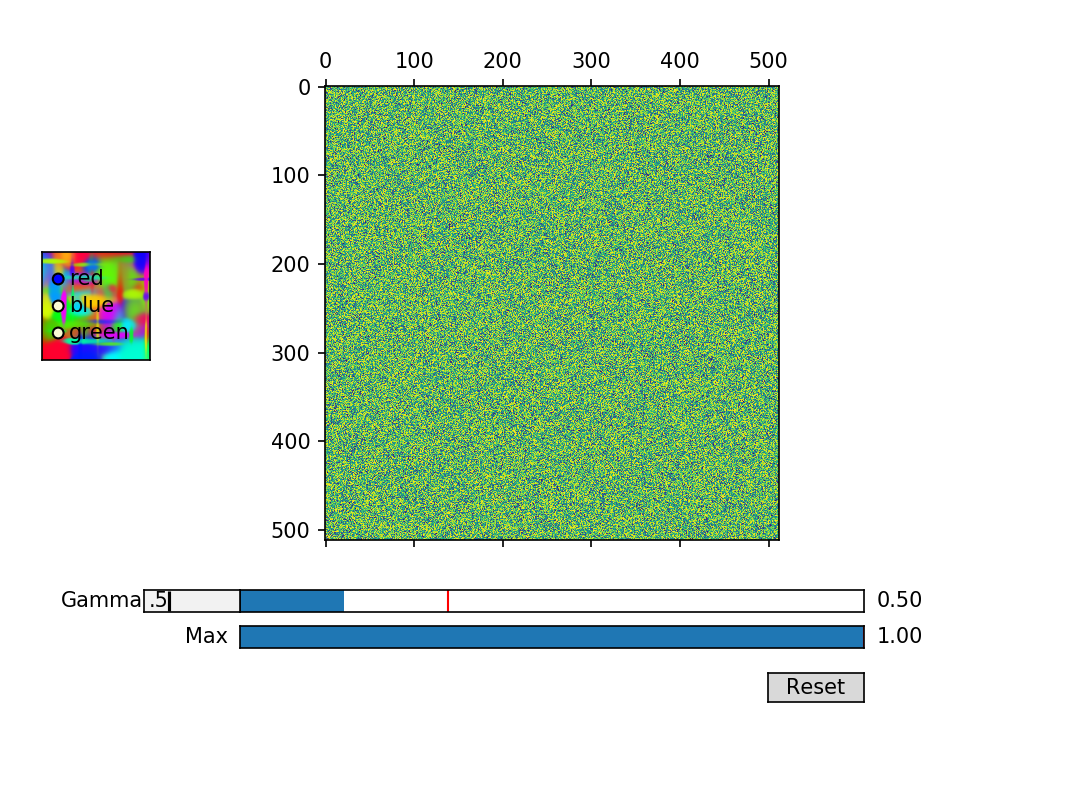

0

In [26]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=0.25, bottom=0.25)
t = np.random.rand(512, 512)
a0 = t.max()
g0 = 1
# s = a0*np.sin(2*np.pi*g0*t)
l = ax.matshow(t)
# plt.axis([0, 1, -10, 10])
axgamma = fig.add_axes([0.25, 0.15, 0.65, 0.03])
axgamma2 = fig.add_axes([0.15, 0.15, 0.1, 0.03])
axvmax = fig.add_axes([0.25, 0.1, 0.65, 0.03])

sgamma = Slider(axgamma, '', 0.0, 3.0, valinit=g0, dragging=False)
svmax = Slider(axvmax, 'Max', t.min(), t.max(), valinit=a0)
tgamma = TextBox(axgamma2, "Gamma")

def update(val):
    vmax = svmax.val
    gamma = sgamma.val
    l.set_norm(matplotlib.colors.PowerNorm(gamma, vmax=vmax))
    fig.canvas.draw_idle()
sgamma.on_changed(update)
svmax.on_changed(update)
def update2(val):
    sgamma.set_val(float(tgamma.text))
tgamma.on_submit(update2)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='g')


def reset(event):
    sgamma.reset()
    svmax.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

In [27]:
import pandas as pd
import numpy as np

In [28]:
a = np.arange(10)

In [30]:
%load_ext autoreload
%autoreload 2
import palm_diagnostics as pdiag

In [35]:
pdiag.PALMData.peak_col.values()

dict_values(['x0', 'y0', 'nphotons', 'frame', 'sigma_x', 'sigma_y', 'sigma_z', 'z0', 'offset', 'amp'])

In [78]:
data = pd.DataFrame(columns=pdiag.PALMData.peak_col.values(), data=np.random.rand(100, len(pdiag.PALMData.peak_col)))

In [79]:
data[['sigma_x', 'sigma_y', 'sigma_z']] = data[['sigma_x', 'sigma_y', 'sigma_z']] * 0.005 + 0.005

In [163]:
img = pdiag.gen_img((1,1), data, mag=1000, cmap="gist_earth")

C:\Users\hoffmand\AppData\Local\Continuum\Anaconda3\lib\site-packages\dask\local.py:271: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


In [164]:
img.shape

(1000, 1000, 4)

In [82]:
from matplotlib.colors import ListedColormap

In [153]:
def _norm_data(self, alpha=False, **kwargs):
    """"""
    # power norm will normalize alpha to 0 to 1 after applying
    # a gamma correction and limiting data to vmin and vmax
    pkwargs = dict(gamma=1, clip=True)
    pkwargs.update(kwargs)
    print(pkwargs)
    new_alpha = pdiag.PowerNorm(**pkwargs)(self.alpha)
    if alpha:
        new_data = np.dstack((self.RGB, new_alpha))
    else:
        new_data = self.RGB * new_alpha[..., None]
    print(new_data.shape)
    print(new_alpha.max())
    print(new_data.max())
    return new_data

In [154]:
pdiag.DepthCodedImage._norm_data = _norm_data

In [165]:
dci = pdiag.DepthCodedImage(img, "gist_earth", 1000, (data.z0.min(), data.z0.max()))

In [157]:
dci.save_color("test21.png", gamma=1, vmax=.001)

{'gamma': 1, 'clip': True, 'vmax': 0.001}
(1000, 1000, 3)
1.0
0.999604163675


In [167]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

In [186]:
import matplotlib.font_manager as fm

In [196]:
dci.save("test.tif")

In [197]:
dci2=pdiag.DepthCodedImage.load("test.tif")

NotImplementedError: 

In [317]:
class junk(np.ndarray):
    def __new__(cls, data, cmap, mag, zrange):
        # Input array is an already formed ndarray instance
        # We first cast to be our class type
        if data.ndim != 3 or data.shape[-1] != 4:
            raise RuntimeError
        obj = np.asarray(data).view(cls)
        # add the new attribute to the created instance
        obj.cmap = cmap
        obj.mag = mag
        obj.zrange = zrange
        # Finally, we must return the newly created object:
        return obj

    def __array_finalize__(self, obj):
        # see InfoArray.__array_finalize__ for comments
        if obj is None:
            return
        self.cmap = getattr(obj, 'cmap', None)
        self.mag = getattr(obj, 'mag', None)
        self.zrange = getattr(obj, 'zrange', None)
    
    @property
    def test(self):
        return self[..., 3]

In [318]:
j= junk(img, 1, 1, 1)

In [319]:
j[1]

junk([[ nan,  nan,  nan,   0.],
      [ nan,  nan,  nan,   0.],
      [ nan,  nan,  nan,   0.],
      ..., 
      [ nan,  nan,  nan,   0.],
      [ nan,  nan,  nan,   0.],
      [ nan,  nan,  nan,   0.]])

In [320]:
j.test

junk([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
      [ 0.,  0.,  0., ...,  0.,  0.,  0.],
      [ 0.,  0.,  0., ...,  0.,  0.,  0.],
      ..., 
      [ 0.,  0.,  0., ...,  0.,  0.,  0.],
      [ 0.,  0.,  0., ...,  0.,  0.,  0.],
      [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

<IPython.core.display.Javascript object>


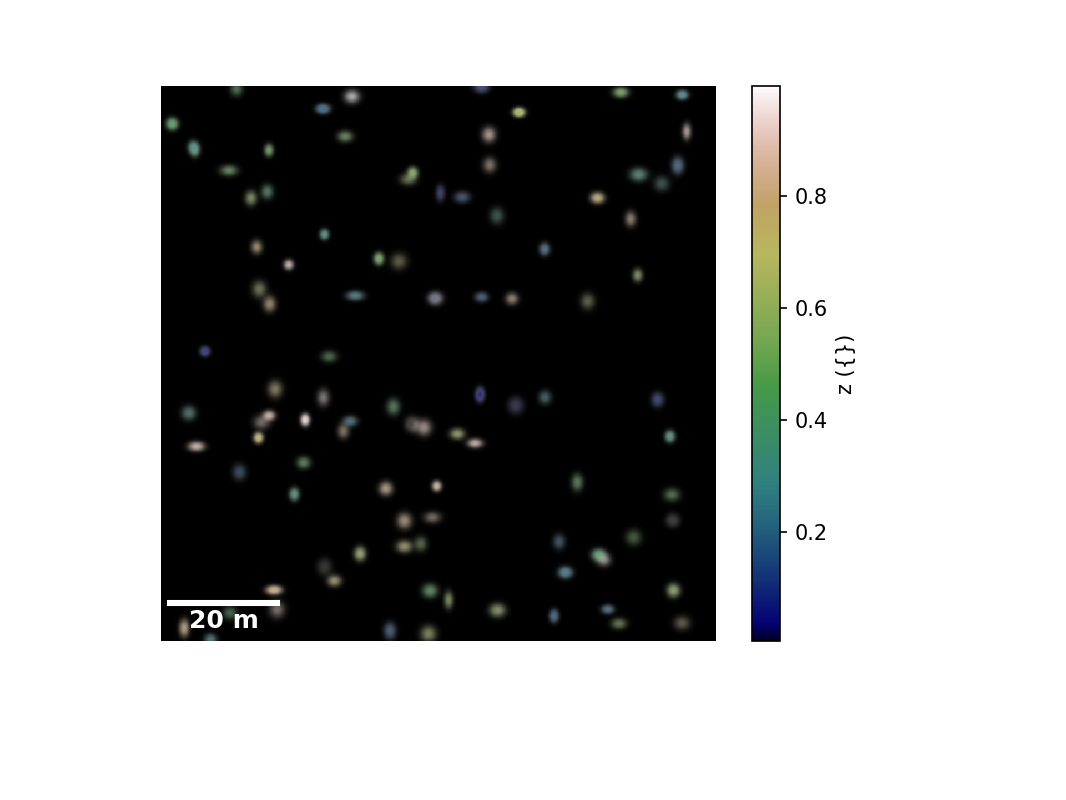

In [201]:
# with plt.style.context("dph_presentation"):
fig, ax = plt.subplots()
cbar = ax.matshow(np.linspace(dci.zrange[0], dci.zrange[1], 256).reshape(16, 16), cmap=dci.cmap)
ax.imshow(dci2.data[..., :3], interpolation=None)
ax.matshow(dci2.data[..., 3], norm=pdiag.PowerNorm(1), cmap=ListedColormap([(i / 255,) * 3 + ((255 - i) / 255,) for i in range(256)]))
fig.colorbar(cbar, label="z ({})")
scalebar = AnchoredSizeBar(ax.transData,
                           200, '20 m', 'lower left', 
                           pad=0.2,
                           color='white',
                           frameon=False,
                           size_vertical=20/3,
                          fontproperties=fm.FontProperties(size="large", weight="bold"))
ax.set_axis_off()
ax.add_artist(scalebar)